In [21]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Config estilo dos gráficos
sns.set(style="whitegrid")

# Dataset
columns = ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth', 'AsymmetryCoefficient', 'KernelGrooveLength', 'Class']
data_path = '/content/seeds_dataset.txt'
df = pd.read_csv(data_path, sep='\t', header=None, names=columns, on_bad_lines='skip')
# Primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(df.head())




Primeiras linhas do dataset:
    Area  Perimeter  Compactness  KernelLength  KernelWidth  \
0  15.26      14.84       0.8710         5.763        3.312   
1  14.88      14.57       0.8811         5.554        3.333   
2  14.29      14.09       0.9050         5.291        3.337   
3  13.84      13.94       0.8955         5.324        3.379   
4  16.14      14.99       0.9034         5.658        3.562   

   AsymmetryCoefficient  KernelGrooveLength  Class  
0                 2.221               5.220      1  
1                 1.018               4.956      1  
2                 2.699               4.825      1  
3                 2.259               4.805      1  
4                 1.355               5.175      1  



Estatísticas descritivas:
             Area   Perimeter  Compactness  KernelLength  KernelWidth  \
count  199.000000  199.000000   199.000000    199.000000   199.000000   
mean    14.918744   14.595829     0.870811      5.643151     3.265533   
std      2.919976    1.310445     0.023320      0.443593     0.378322   
min     10.590000   12.410000     0.808100      4.899000     2.630000   
25%     12.330000   13.470000     0.857100      5.267000     2.954500   
50%     14.430000   14.370000     0.873400      5.541000     3.245000   
75%     17.455000   15.805000     0.886800      6.002000     3.564500   
max     21.180000   17.250000     0.918300      6.675000     4.033000   

       AsymmetryCoefficient  KernelGrooveLength       Class  
count            199.000000          199.000000  199.000000  
mean               3.699217            5.420653    1.994975  
std                1.471102            0.492718    0.813382  
min                0.765100            4.519000    1.000000  
25%  

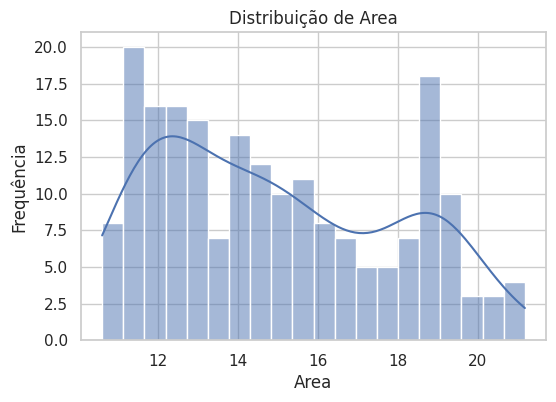

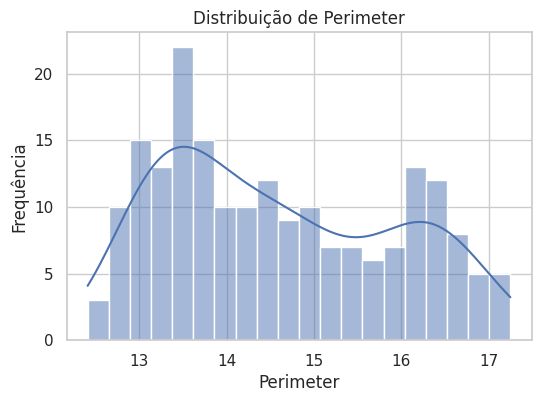

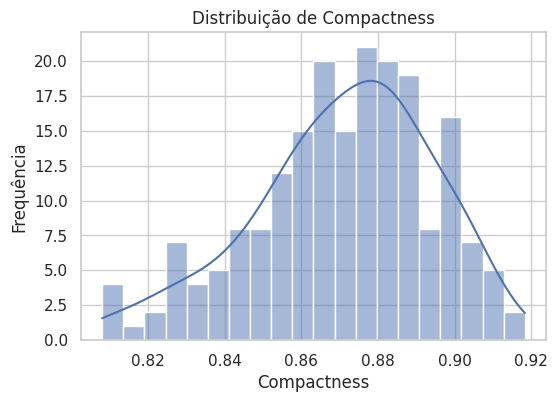

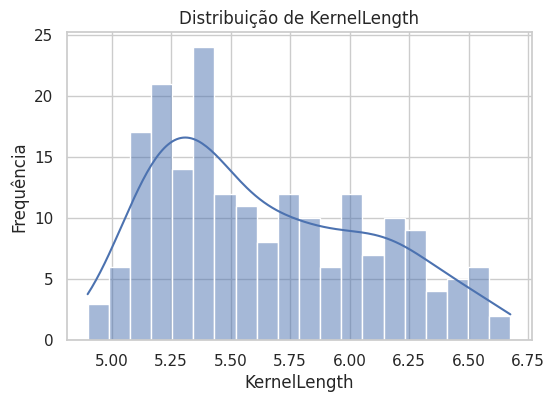

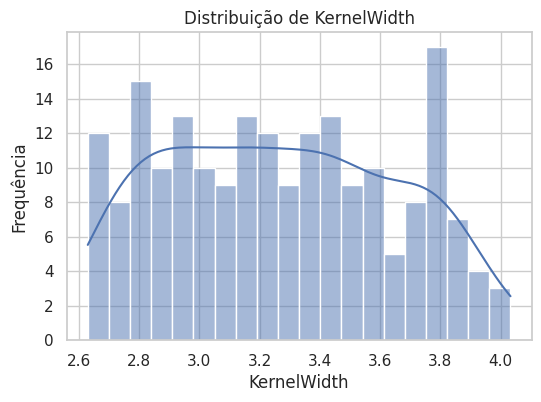

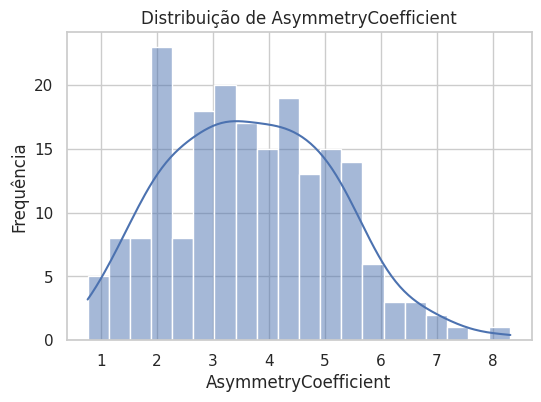

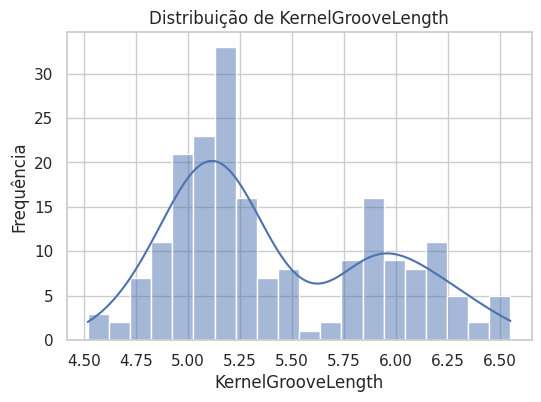

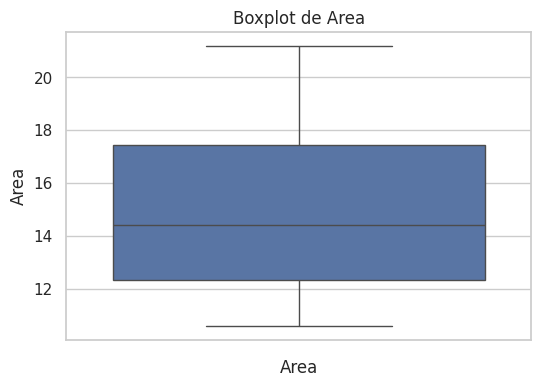

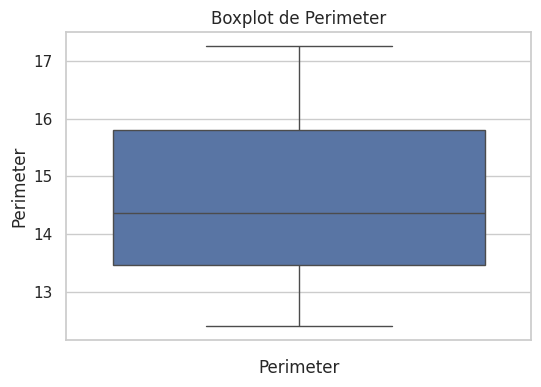

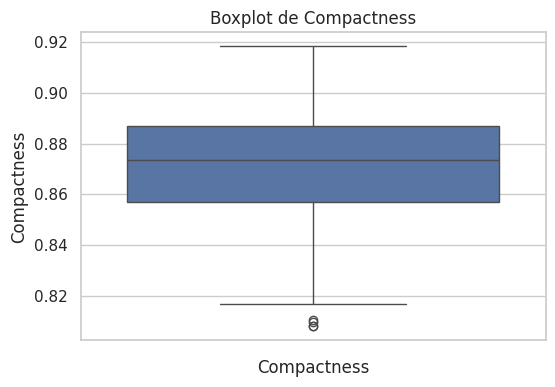

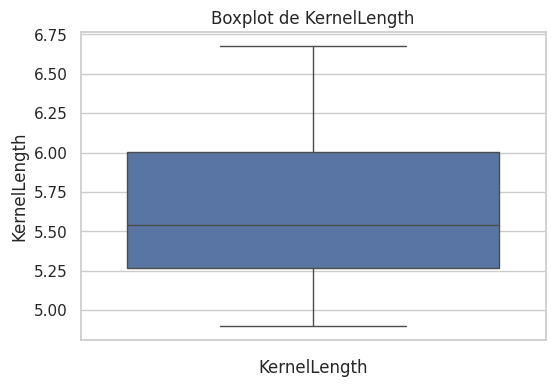

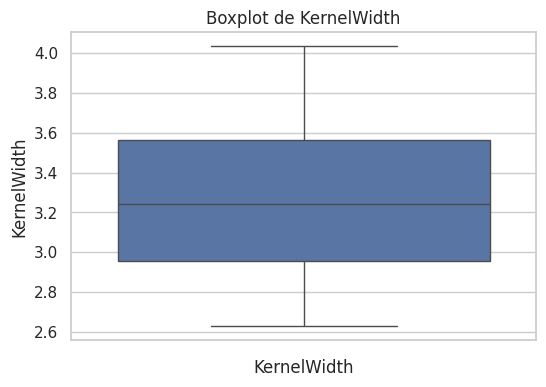

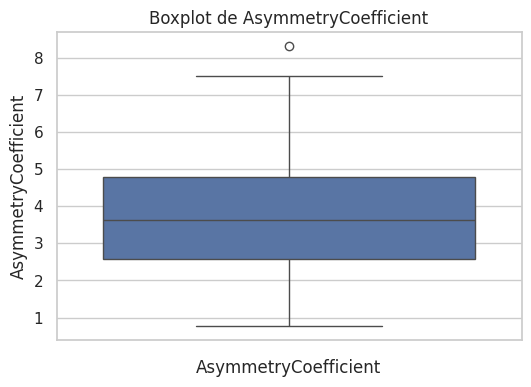

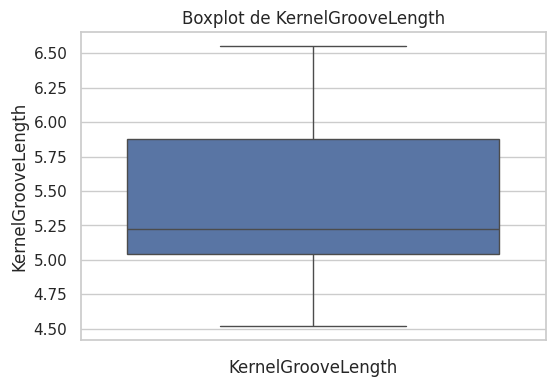

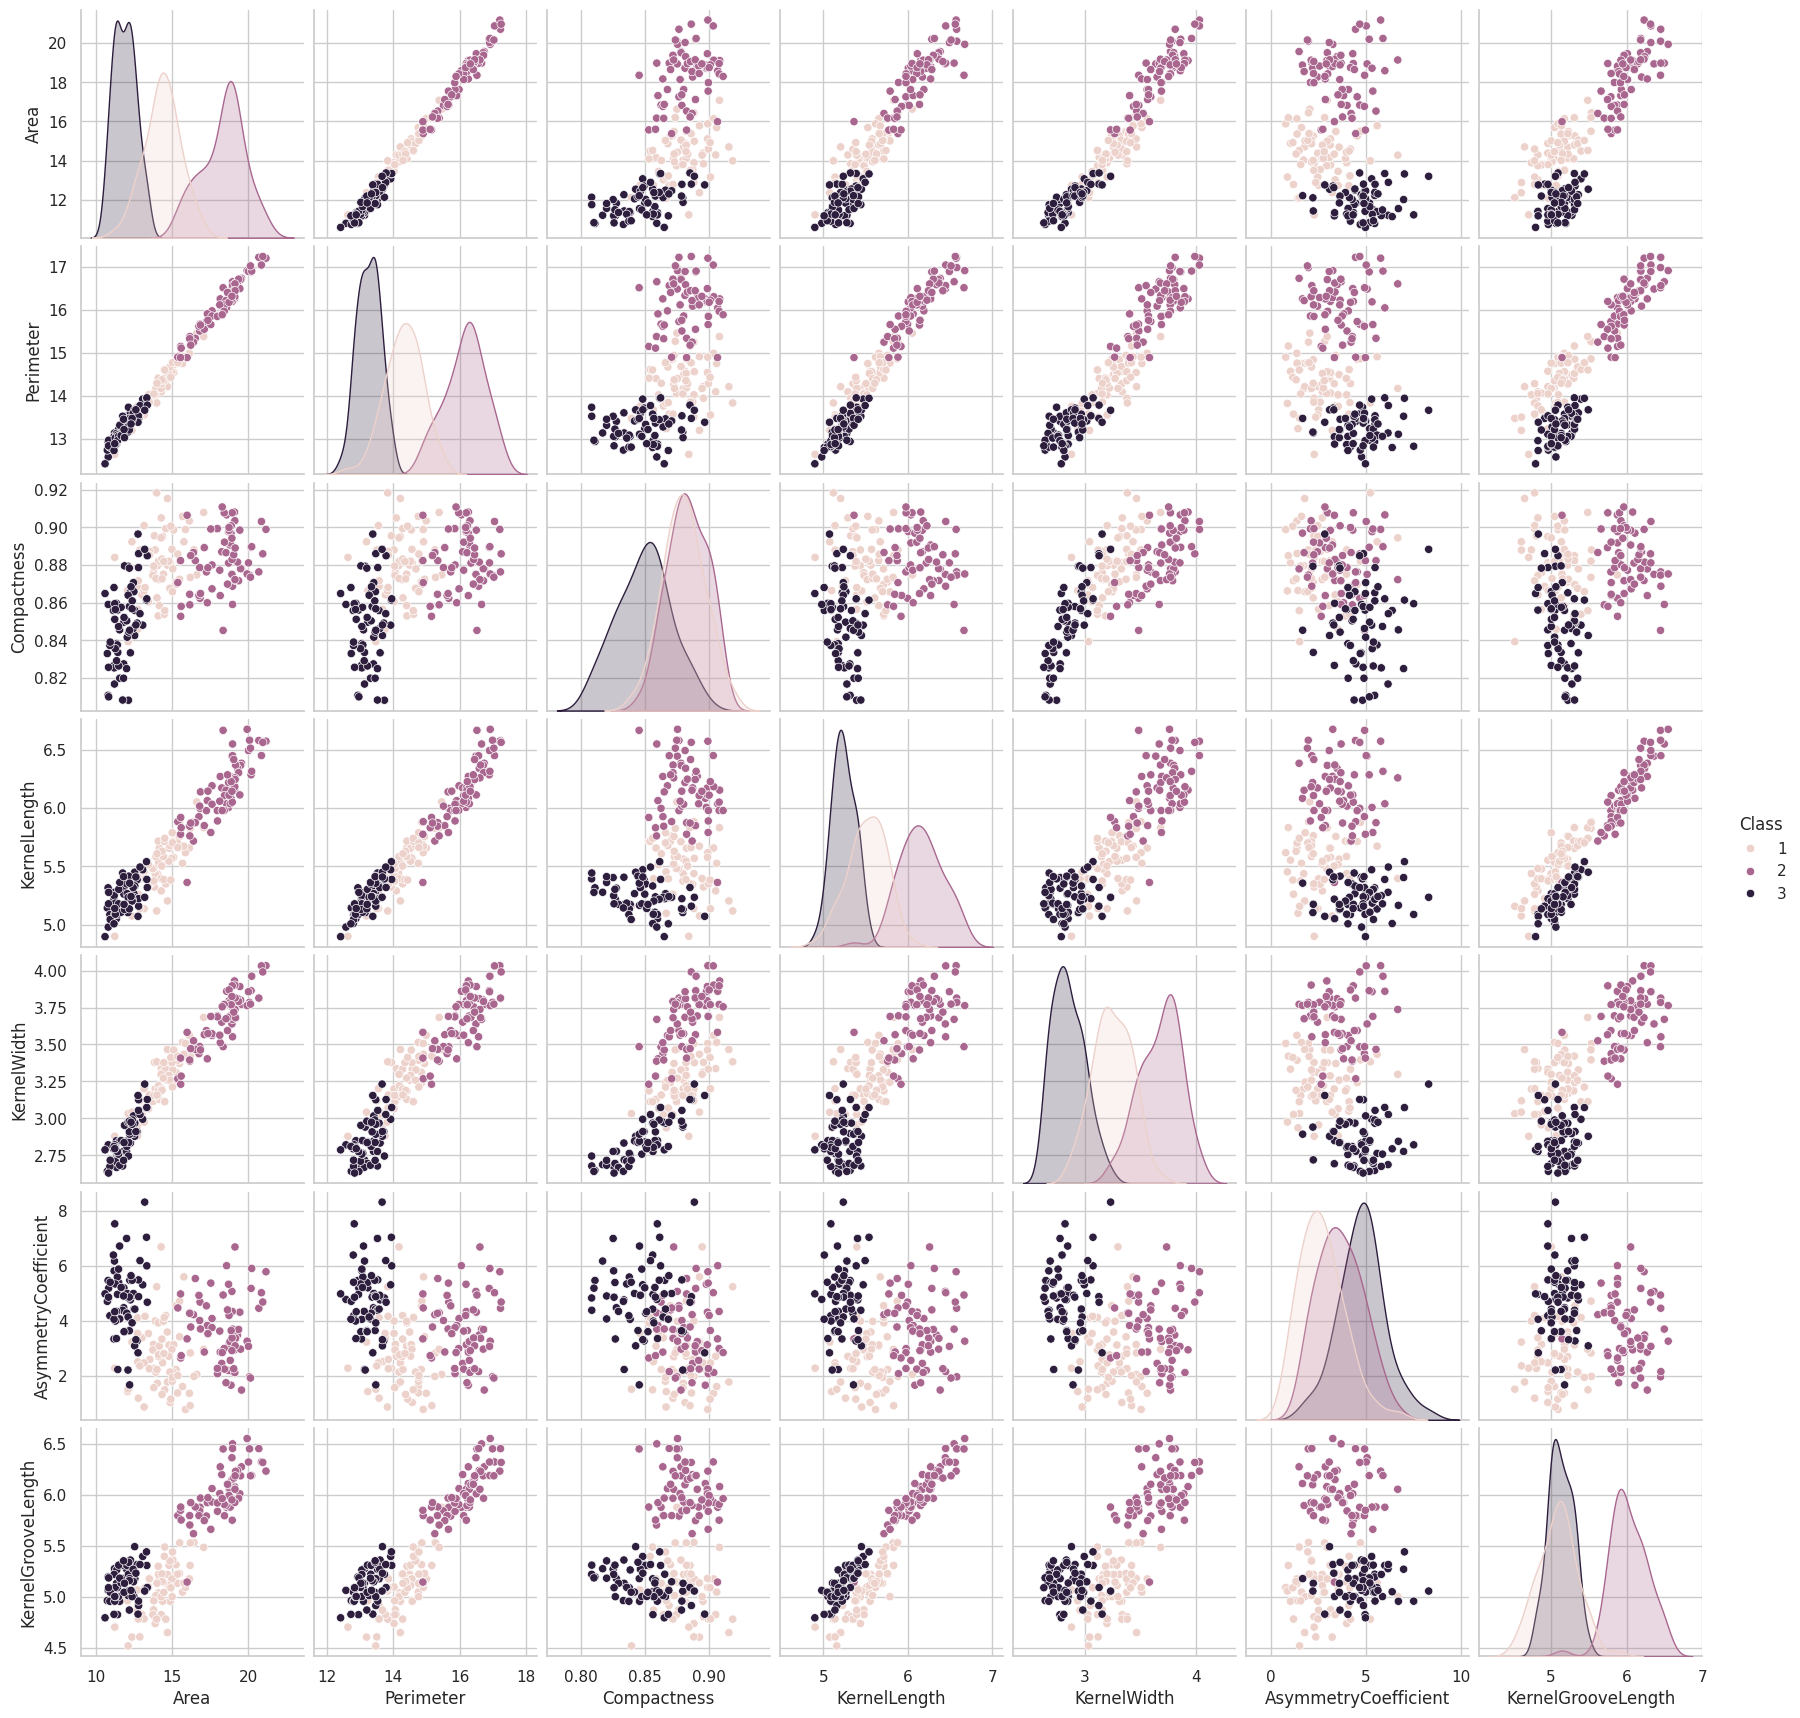

In [22]:
# Análise exploratória
print("\nEstatísticas descritivas:")
print(df.describe())

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Preencher valores ausentes (se houver)
df.fillna(df.mean(), inplace=True)

# Visualizar a distribuição dos atributos
for column in columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.show()

# Boxplots para identificar outliers
for column in columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()

# Gráficos de dispersão para correlação entre os atributos
sns.pairplot(df, hue='Class', diag_kind='kde')
plt.show()

# Escalonamento dos dados
X = df.iloc[:, :-1]
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



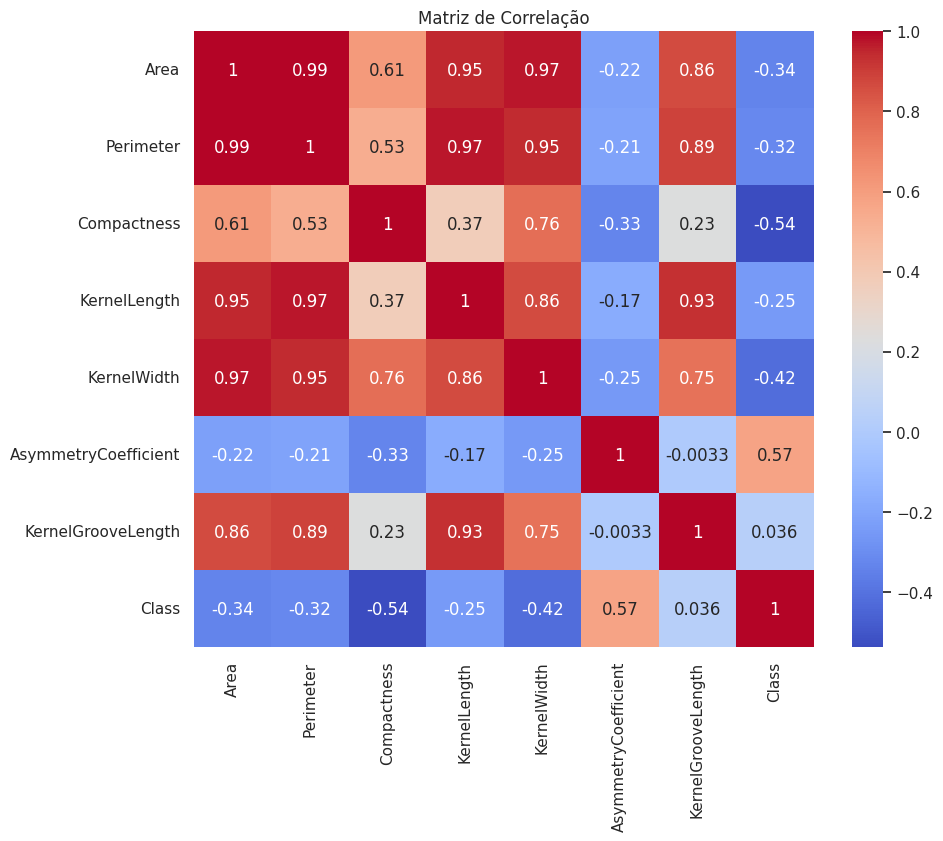

In [23]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [25]:
# Divisão em conjuntos de treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Treinamento e Avaliação dos modelos
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    print(f"\nTreinando o modelo: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Relatório de Classificação - {name}:")
    print(classification_report(y_test, y_pred))

    print(f"Matriz de Confusão - {name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50)




Treinando o modelo: KNN
Relatório de Classificação - KNN:
              precision    recall  f1-score   support

           1       0.86      0.80      0.83        15
           2       1.00      1.00      1.00        25
           3       0.86      0.90      0.88        20

    accuracy                           0.92        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.92      0.92      0.92        60

Matriz de Confusão - KNN:
[[12  0  3]
 [ 0 25  0]
 [ 2  0 18]]


Treinando o modelo: SVM
Relatório de Classificação - SVM:
              precision    recall  f1-score   support

           1       0.86      0.80      0.83        15
           2       1.00      1.00      1.00        25
           3       0.86      0.90      0.88        20

    accuracy                           0.92        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.92      0.92      0.92        60

Matriz de Confusão - SVM:
[[12  0  3]
 [ 0 25  0]
 [ 2  

In [26]:
# Otimização com GridSearchCV (exemplo para KNN)
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("\nMelhores parâmetros para KNN:")
print(grid_knn.best_params_)

# Testando o modelo otimizadoo
best_knn = grid_knn.best_estimator_
y_pred_knn_optimized = best_knn.predict(X_test)

print("\nRelatório de Classificação - KNN Otimizado:")
print(classification_report(y_test, y_pred_knn_optimized))

print("\nMatriz de Confusão - KNN Otimizado:")
print(confusion_matrix(y_test, y_pred_knn_optimized))


Melhores parâmetros para KNN:
{'n_neighbors': 5, 'weights': 'distance'}

Relatório de Classificação - KNN Otimizado:
              precision    recall  f1-score   support

           1       0.86      0.80      0.83        15
           2       1.00      1.00      1.00        25
           3       0.86      0.90      0.88        20

    accuracy                           0.92        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.92      0.92      0.92        60


Matriz de Confusão - KNN Otimizado:
[[12  0  3]
 [ 0 25  0]
 [ 2  0 18]]


In [27]:
# Definindo a grade de parâmetros para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Aplicando GridSearchCV para encontrar os melhores parâmetros
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Exibindo os melhores parâmetros e o melhor score
print("\nMelhores parâmetros para Random Forest:")
print(grid_rf.best_params_)

# Avaliando o modelo otimizado nos dados de teste
best_rf = grid_rf.best_estimator_
y_pred_rf_optimized = best_rf.predict(X_test)

# Exibindo o relatório de classificação e a matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix

print("\nRelatório de Classificação - Random Forest Otimizado:")
print(classification_report(y_test, y_pred_rf_optimized))

print("\nMatriz de Confusão - Random Forest Otimizado:")
print(confusion_matrix(y_test, y_pred_rf_optimized))


Melhores parâmetros para Random Forest:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Relatório de Classificação - Random Forest Otimizado:
              precision    recall  f1-score   support

           1       0.86      0.80      0.83        15
           2       1.00      0.96      0.98        25
           3       0.86      0.95      0.90        20

    accuracy                           0.92        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.92      0.92      0.92        60


Matriz de Confusão - Random Forest Otimizado:
[[12  0  3]
 [ 1 24  0]
 [ 1  0 19]]


In [28]:

# Definindo a grade de parâmetros para SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Aplicando GridSearchCV para encontrar os melhores parâmetros
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Exibindo os melhores parâmetros e o melhor score
print("\nMelhores parâmetros para SVM:")
print(grid_svm.best_params_)

# Avaliando o modelo otimizado nos dados de teste
best_svm = grid_svm.best_estimator_
y_pred_svm_optimized = best_svm.predict(X_test)

# Exibindo o relatório de classificação e a matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix

print("\nRelatório de Classificação - SVM Otimizado:")
print(classification_report(y_test, y_pred_svm_optimized))

print("\nMatriz de Confusão - SVM Otimizado:")
print(confusion_matrix(y_test, y_pred_svm_optimized))



Melhores parâmetros para SVM:
{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

Relatório de Classificação - SVM Otimizado:
              precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       1.00      1.00      1.00        25
           3       0.90      0.90      0.90        20

    accuracy                           0.93        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.93      0.93      0.93        60


Matriz de Confusão - SVM Otimizado:
[[13  0  2]
 [ 0 25  0]
 [ 2  0 18]]


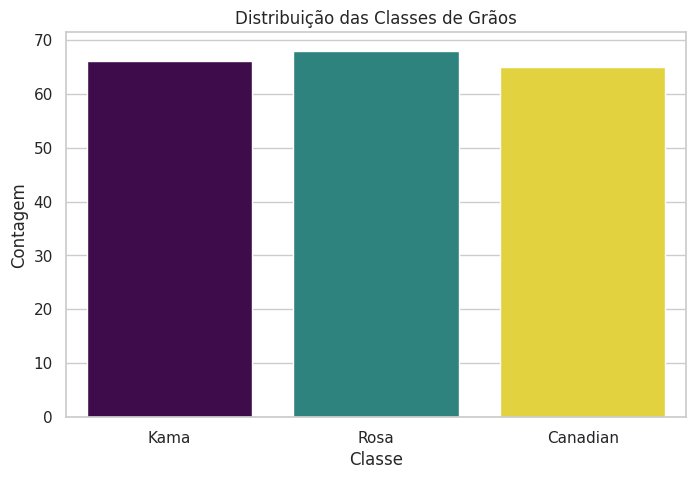

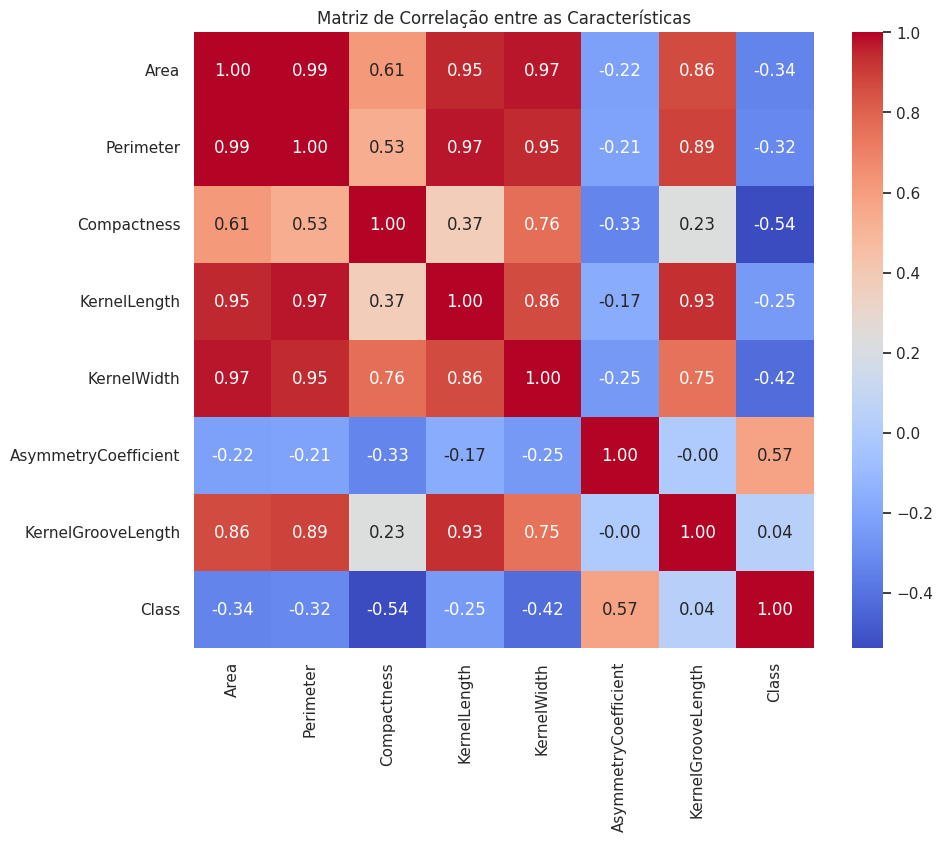

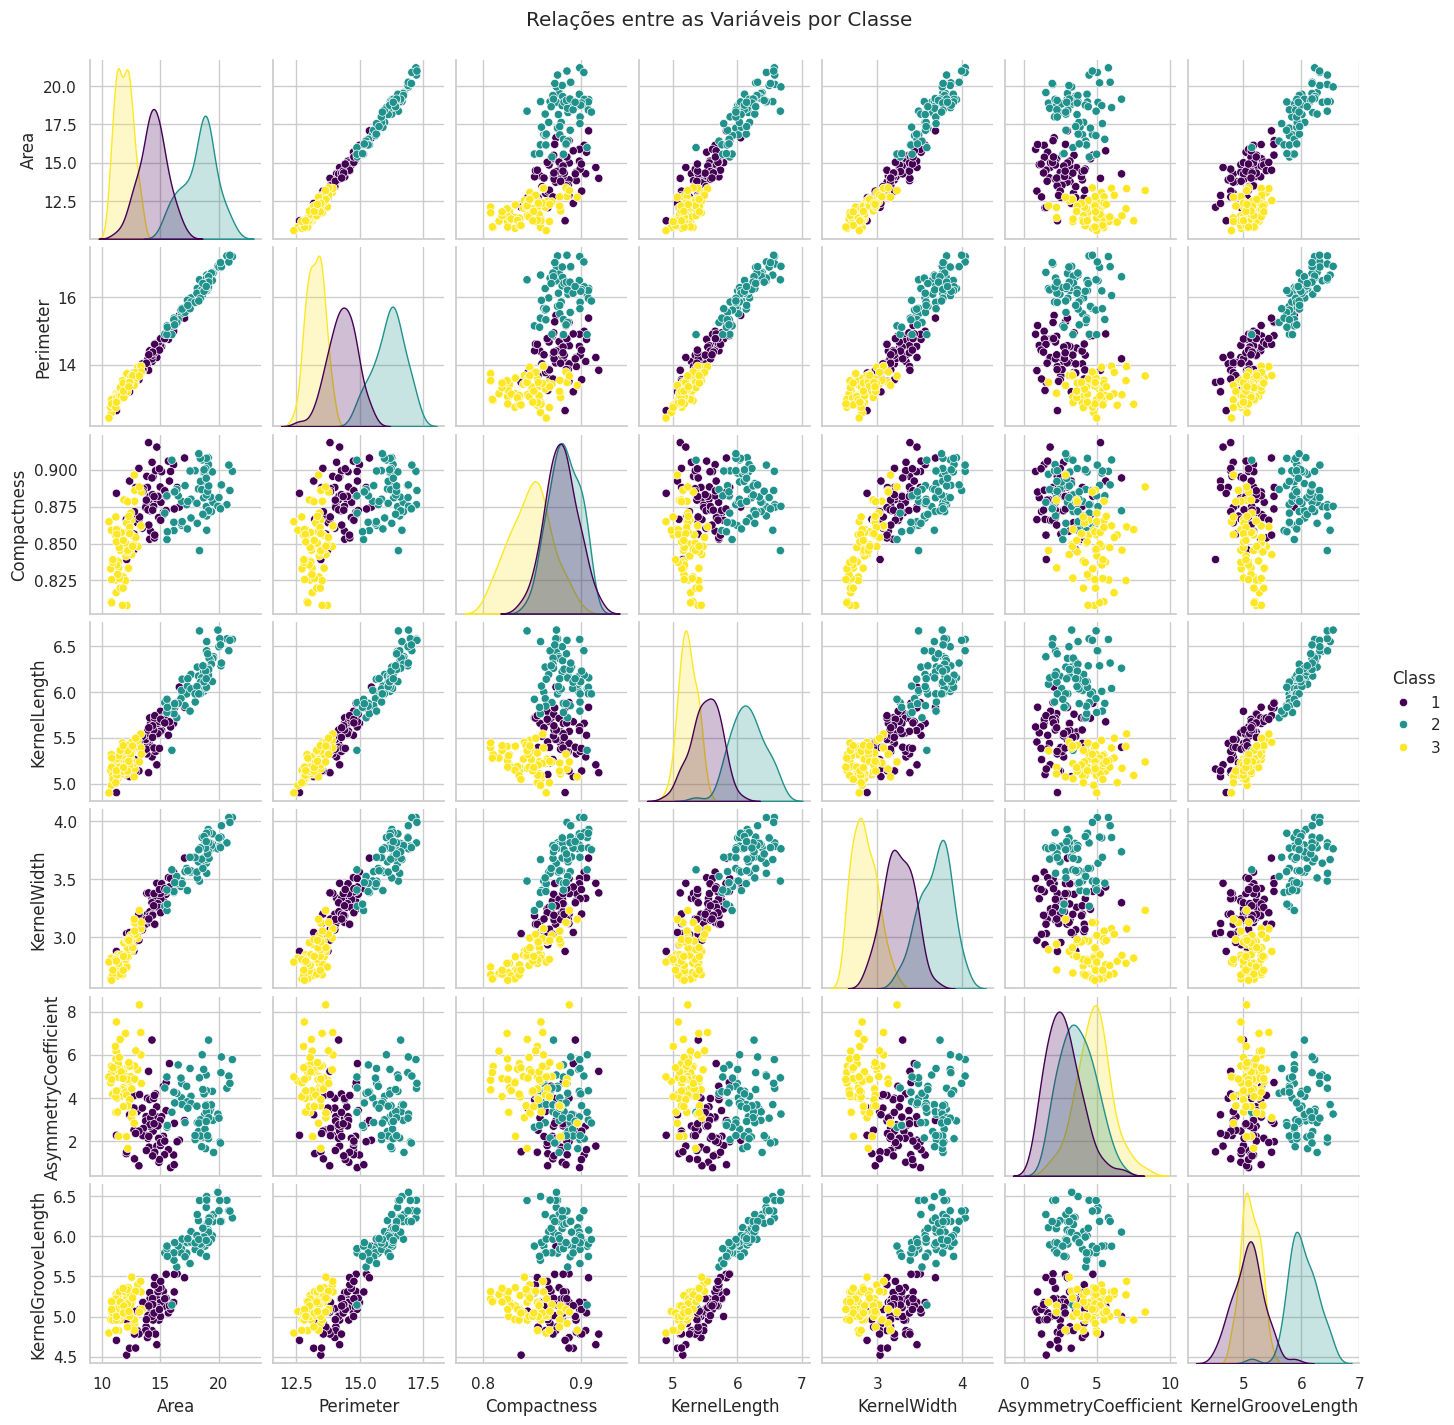

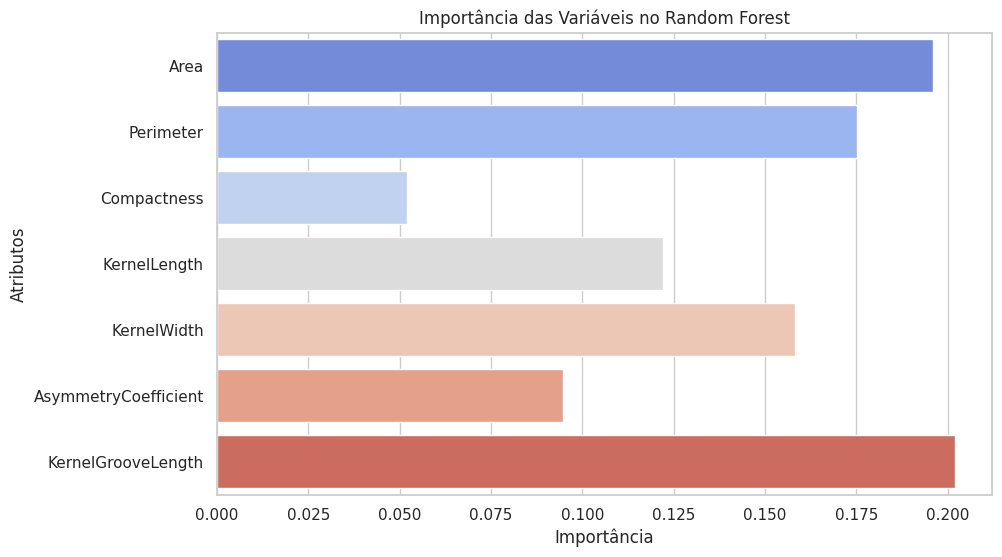

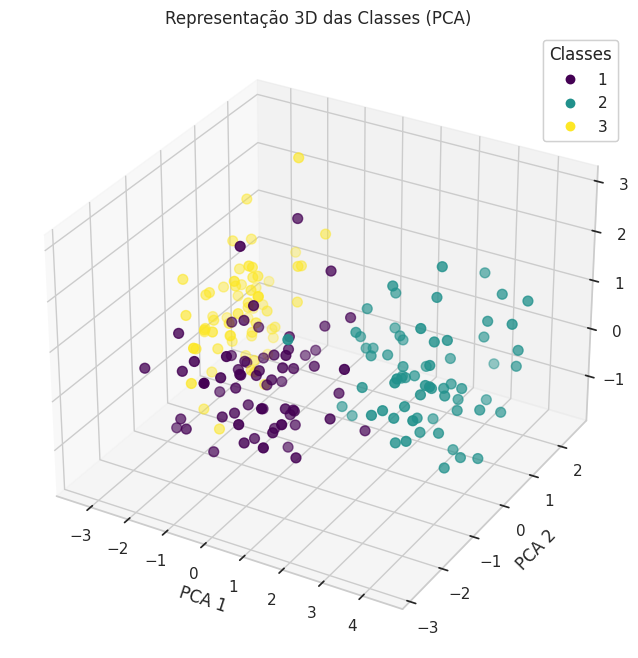

In [31]:
## Alguns gráficos para exploração

# Gráfico de barras: distribuição das classes
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df, hue='Class', palette='viridis', legend=False)
plt.title('Distribuição das Classes de Grãos')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1, 2], labels=['Kama', 'Rosa', 'Canadian'])
plt.show()

# Matriz de correlação com heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre as Características')
plt.show()

# Pairplot com destaque para as classes
sns.pairplot(df, hue='Class', palette='viridis', diag_kind='kde', height=2)
plt.suptitle('Relações entre as Variáveis por Classe', y=1.02)
plt.show()

# Importância das variáveis no Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
features = df.columns[:-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, hue=features, palette='coolwarm', legend=False)
plt.title('Importância das Variáveis no Random Forest')
plt.xlabel('Importância')
plt.ylabel('Atributos')
plt.show()

# Gráfico de dispersão 3D (utilizando PCA para redução de dimensionalidade)
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Redução para 3 componentes principais
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', s=50)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
ax.set_title('Representação 3D das Classes (PCA)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()
